#BINARY LOSS LOG

#check what is Solver and Data Analysis in EXCEL

# Minimise Loss by changing coefficient

# variable selection

1. Reduction method
       - Do not delete /eliminate variables
       - rather it combines the variables and bring to a lower dimension
2. Selection method
       - Delete /eliminate variables based on a criteria

most prefered method is dimensionality reduction method. It uses PCA algorithm ( Principal Component Analysis ). It uses covariance matrix/ co-relation matrix to combine variables based on a similarity into components.  

Singular Value description (SVD ) developed by Netflix , for recommendation system


Multiple Linear Regression and Binary Logistic Regression elimiate variable whose p-value (probability value) > 0.05.

In Non statistical MEthods - 

    It uses tree based models eg. Decision Tree,Random Forest and Gradient Boosting as part of output they provide variable feature importance. They definitly make some variables as non important.
    
    Numeric  - High variance
    Non numberic - Chisqaure based method

Decision Tree Algorithm

is a binary splitting which is a tree that provides a tree based diagram as an output.





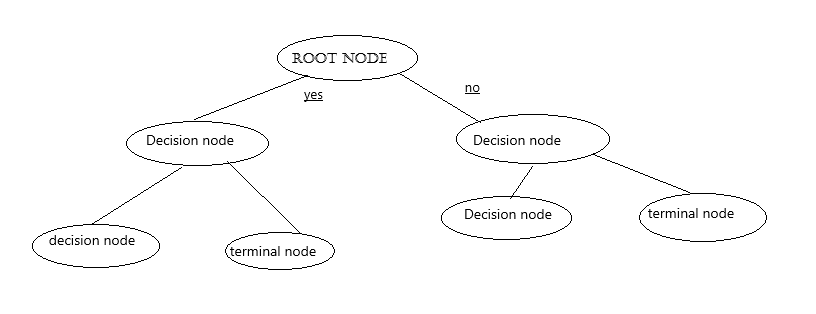

    - The growth stops once all observations are classified into terminal nodes
    - It uses recursive partiotioning.  Where tree splits on previous node number of observations
    - Number of observations reduce as it grow down
    - The tree shall be top down ( root on top  and branches on bottom)
    - There wiill be logical test in every decision node which result in yes/no

# TREE SPLITTING METHODS

1. Gini Impurity/Gini Method

       It is calculated for all independent variablkes with dependet variable. Independant variable that has lowest gini is first splitted and ascending order till 0.50. Gini > 0.50 are deleted from tree. ( This is how feature importance is decided )

The Gini index, also called the Gini impurity, is a metric used to measure the degree of impurity or diversity in a dataset. It is commonly used in decision tree algorithms (e.g., CART: Classification and Regression Trees) to determine the best feature for splitting the data at each node.

Gini = 0: The subset is pure (all samples belong to one class).
Gini = 1: The subset is maximally impure (samples are uniformly distributed across all classes).

2. Entropy  & Information

   Infromation gain = Entropy of dependant variable - entropy of independent variable
      Infromation gain for all independent variables are calculated with dependant variable. Variable that has highest information gain is first splitted and depending on order till 0.50. Information gain less than 0.50 variable is deleted from the tree. It is opposite to Gini Tree.

Entropy = 0: The dataset is completely pure (all samples belong to a single class).
Entropy = 1: The dataset is completely impure (samples are evenly distributed across all classes).


# Entropy vs. Gini Index

Entropy: Provides a more nuanced measure of impurity and works well with a wide range of datasets.
Gini Index: Simpler and faster to compute but can sometimes lead to the same results as entropy in decision tree splits.

In [42]:
from sklearn.tree import DecisionTreeRegressor,plot_tree
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


#bikedf=pd.read_csv(r"C:\Users\kaila\Downloads\bike+sharing+dataset (1)\hour.csv")
bikedf=pd.read_csv('C:/Users/Acer/12JAN-18JAN2025-GENAI/DATASETS/bike-sharing/hour.csv')

numcols=bikedf[['temp', 'atemp', 'hum', 'windspeed','casual', 'registered', 'cnt']]
objcols=bikedf[['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday','workingday', 'weathersit']]

In [43]:
objcols_dummy=pd.get_dummies(objcols,columns=['season', 'yr', 'mnth', 'hr', 
                                              'holiday', 'weekday', 
                                              'workingday','weathersit'])

In [44]:
bikedf_final=pd.concat([numcols,objcols_dummy],axis=1)

In [45]:
# Split Data into y & X
y=bikedf_final.cnt
X=bikedf_final.drop('cnt',axis=1)

In [46]:
from sklearn.linear_model import LinearRegression

In [47]:
regmodel=LinearRegression().fit(X,y)
regmodel.score(X,y) # Overfitting due to multicollinearity

1.0

In [48]:
X_new=X.drop(['atemp','registered'],axis=1)

In [49]:
regmodel_new=LinearRegression().fit(X_new,y)

In [50]:
regmodel_new.score(X_new,y)

0.8106137757618999

In [51]:
regmodel_new_pred=regmodel_new.predict(X_new)

In [52]:
from sklearn.metrics import root_mean_squared_error

In [53]:
root_mean_squared_error(y,regmodel_new_pred) # RMSE

78.9349412459004

In [54]:
regmodel_log=LinearRegression().fit(X_new,np.log(y))

In [55]:
regmodel_log.score(X_new,np.log(y))

0.8356867702598316

In [56]:
regmodel_log_pred=regmodel_log.predict(X_new)

In [57]:
regmodel_log_pred=np.exp(regmodel_log_pred)

In [58]:
root_mean_squared_error(y,regmodel_log_pred)

103.24020971335555

In [59]:
treemodel=DecisionTreeRegressor().fit(X,y)
treemodel.score(X,y)

1.0

# TREE MODEL SCORE 1

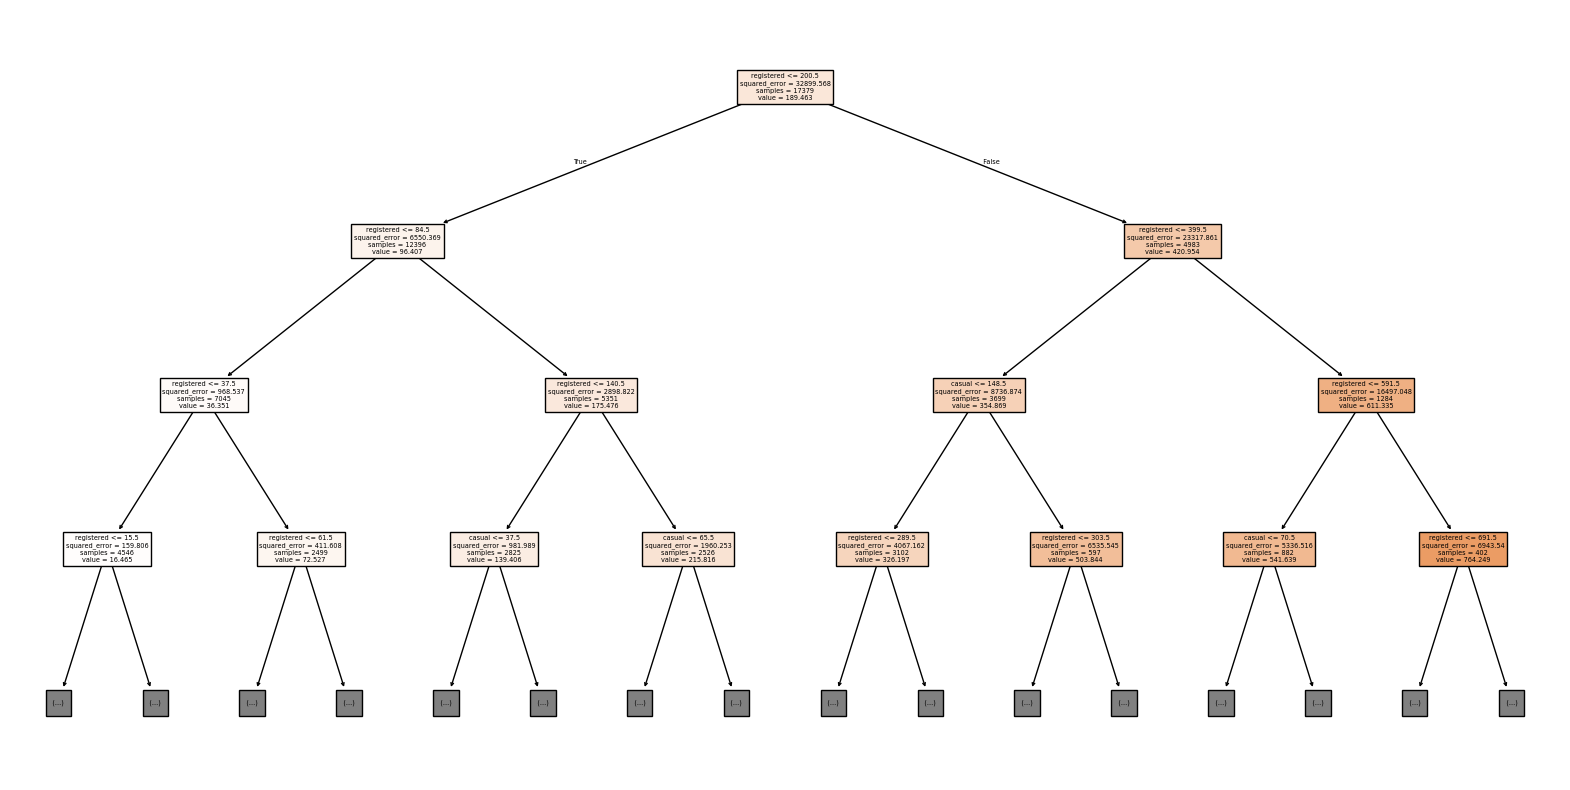

In [61]:
plt.figure(figsize=(20,10))
plot_tree(treemodel,feature_names=X.columns,filled=True,max_depth=3)
plt.show()

In [62]:
pd.DataFrame(X.columns,treemodel.feature_importances_).sort_index(ascending=False)

,0
9.450274e-01,registered
5.481973e-02,casual
3.577920e-05,mnth_3
2.155887e-05,hum
1.448714e-05,windspeed
...,...
3.005471e-08,hr_0
1.923879e-09,hr_5
8.744904e-10,hr_4
0.000000e+00,hr_3


# Genies considered are given in the above cell. As these are greater than 0


Decision trees often overfit. To check overfittingt cross validation is done 
Cross validation is repeated testing model with randomly subsetted samples from origninal data.
sample size 35% and CV times - 5



In [63]:
from sklearn.model_selection import cross_val_score

In [64]:
cross_val_score(treemodel,X,y,cv=3) #by default 5

array([0.99871641, 0.99903587, 0.99353549])

The above line of code will print an array. Then take mean of the above result array

In [65]:
np.mean([0.99871641, 0.99903587, 0.99353549])

0.9970959233333333

# CROSS MODEL AVERAGE .997

the above mean will given the corss validated average
the trained model average is (# TREE MODEL SCORE  ) 1 and cross model average - .99 no Overfitting
But if corss validated average is netween .70-.85 it means overfitting


In [70]:
treemodel_Depth8=DecisionTreeRegressor(max_depth=8).fit(X,y)

In [71]:
treemodel_Depth8.score(X,y)

0.9983187537634894

In [ ]:
import streamlit